In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from tqdm import tqdm
import time

In [2]:
sns.set_theme()

In [ ]:
font = {'family' : 'Microsoft Yahei',
              'size'   : 10}
matplotlib.rc('font', **font)

label_fontsize = 12
title_fontsize = 14

plt.rcParams['axes.edgecolor'] = 'black'

In [4]:
data_path = "内蒙古自治区锡林郭勒盟典型草原不同放牧强度土壤碳氮监测数据集（2012年8月15日-2020年8月15日）.xlsx"
data = pd.read_excel(data_path, usecols=range(0, 8))
data

,year,放牧小区（plot）,放牧强度（intensity）,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比
0,2012,G17,NG,17.051564,11.300000,28.351564,2.192376,12.931887
1,2012,G19,NG,19.529439,11.333333,30.862772,1.883051,16.389768
2,2012,G21,NG,14.549908,9.600000,24.149908,1.871001,13.818022
3,2012,G6,LGI,18.672931,12.666667,31.339598,2.407612,12.160230
4,2012,G12,LGI,13.904905,8.133333,22.038239,1.933916,11.395652
...,...,...,...,...,...,...,...,...
127,2020,G11,MGI,14.744350,3.353600,18.097950,1.961450,9.226822
128,2020,G16,MGI,14.777000,9.819450,24.596450,1.712250,14.364988
129,2020,G9,HGI,17.200000,3.122150,20.322150,2.236950,9.084758
130,2020,G13,HGI,16.691900,3.564700,20.256600,2.102850,9.632927


In [5]:
data.groupby(by=["year", "放牧强度（intensity）"]).std()

SOC土壤有机碳  SIC土壤无机碳   STC土壤全碳       全氮N    土壤C/N比
year 放牧强度（intensity）                                                  
2012 HGI              2.843557  3.108588  3.438411  0.427363  2.593070
     LGI              3.370269  2.916481  4.023183  0.445709  3.021494
     MGI              3.124608  4.555090  2.140325  0.329342  3.322680
     NG               4.085091  0.657830  4.453034  0.512512  3.245737
2014 HGI              3.262600  2.201969  4.400335  0.435247  3.339922
     LGI              3.062257  2.384351  2.130920  0.390982  2.787526
     MGI              2.876685  3.949684  3.016380  0.403418  3.757147
     NG               3.115799  2.926887  1.666700  0.372695  3.102339
2016 HGI              4.127458  4.543887  1.264991  0.456220  3.372029
     LGI              4.049895  4.315568  2.448403  0.453075  3.381573
     MGI              4.948774  3.477012  4.277572  0.543587  4.148841
     NG               3.477120  4.310302  2.244177  0.486358  4.119639
2018 HGI              2.916894  3.615284  1.816616  0.364169  2.621114
     LGI              3.251665  4.180245  3.655142  0.454950  3.313418
     MGI              3.975830  4.905892  4.832162  0.482600  3.895962
     NG               3.964640  4.508541  1.949495  0.497894  3.395070
2020 HGI              0.618300  0.790042  0.197465  0.094483  0.479001
     LGI              2.312369  2.233232  4.536557  0.163613  1.461866
     MGI              0.184652  4.221179  4.353897  0.138363  3.227649
     NG               1.777542  1.105375  1.299495  0.163821  0.556439

In [6]:
data.groupby(by=["year", "放牧强度（intensity）"]).mean()

SOC土壤有机碳   SIC土壤无机碳    STC土壤全碳       全氮N     土壤C/N比
year 放牧强度（intensity）                                                      
2012 HGI              12.901658  11.424889  24.326547  1.593243  16.220142
     LGI              12.939553  11.125000  24.064553  1.693747  14.546105
     MGI              13.180793   8.401389  21.582182  1.737296  12.759214
     NG               13.628919  10.638889  24.267808  1.529043  16.883203
2014 HGI              14.008619   9.833333  23.841952  1.594100  15.568128
     LGI              14.241521  10.572167  24.813688  1.698554  15.117910
     MGI              14.133203   8.850000  22.983203  1.616101  14.959043
     NG               14.531920   9.166667  23.698587  1.674412  14.707279
2016 HGI              14.918323   6.948148  21.866471  1.879396  12.346293
     LGI              15.453495   6.429815  21.883310  1.850568  12.511520
     MGI              14.381208   6.800370  21.181578  1.727726  13.222903
     NG               15.377630   6.964074  22.341704  1.824063  13.197403
2018 HGI              15.644751   5.605556  21.250307  1.946011  11.332306
     LGI              15.603462   6.827778  22.431240  1.951612  12.070071
     MGI              14.354593   5.994444  20.349037  1.813295  11.905570
     NG               16.969416   6.377778  23.347193  2.058170  12.041725
2020 HGI              16.620500   3.781300  20.401800  2.131467   9.585646
     LGI              16.760483   4.670467  21.430950  2.072817  10.282341
     MGI              14.654483   5.019517  19.674000  1.871583  10.667848
     NG               18.096767   4.817700  22.914467  2.248133  10.209349

考虑到：  
STC土壤全碳 = SOC土壤有机碳 + SIC土壤无机碳  
土壤C/N比 = STC土壤全碳 / 全氮N  
仅预测土壤有机碳、无机碳、全氮

In [7]:
data = data.drop(columns=["STC土壤全碳", "土壤C/N比"])
data["放牧强度"] = data["放牧强度（intensity）"].map({"NG": 0, "LGI": 2, "MGI": 4, "HGI": 8})

#### 可视化
- 查看12个放牧小区的SOC土壤有机碳、SIC土壤无机碳、全氮N的逐年变化

In [8]:
def plot(df, axes):
    index = df.index.tolist()
    xticks, legend = list(zip(*index))
    legend = legend[0]
    for i in range(3):
        ax = axes[i]
        ax.plot(xticks, df.iloc[:, i], 'o-', markersize=10, label=legend)
        ax.set_xticks(xticks)
        ax.set_xlabel("年份", fontsize=label_fontsize)
        ax.set_ylabel("含量", fontsize=label_fontsize)
        ax.set_title(df.columns[i])
        ax.legend()

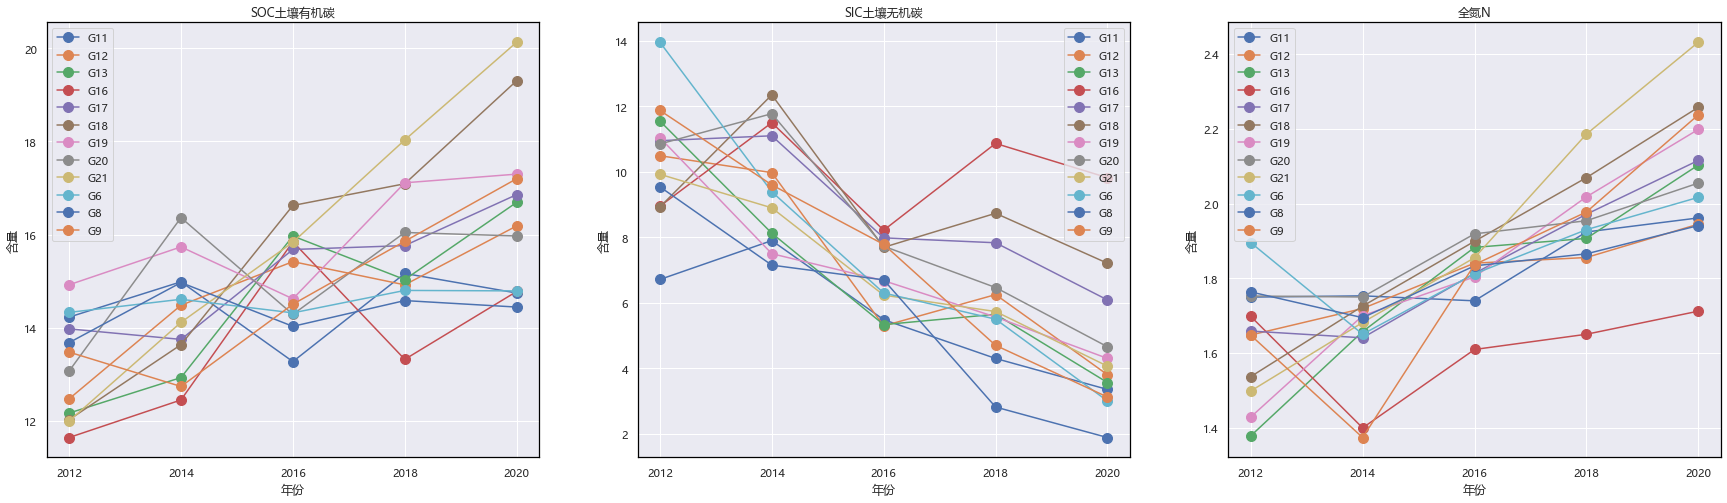

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(30, 8))
for i in data.groupby(by=["year", "放牧小区（plot）"]).agg("mean").groupby("放牧小区（plot）"):
    plot(i[1], axes)

- SOC土壤有机碳、全氮N、SIC土壤无机碳的相关性

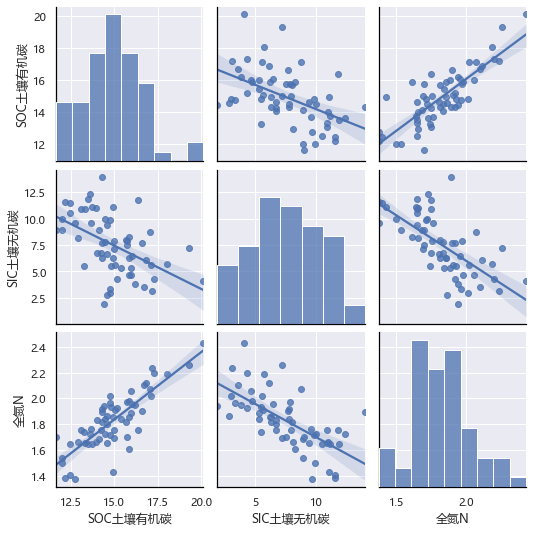

In [10]:
tmp = data.groupby(by=["year", "放牧小区（plot）"]).agg("mean").drop(columns="放牧强度")
sns.pairplot(tmp, kind="reg")

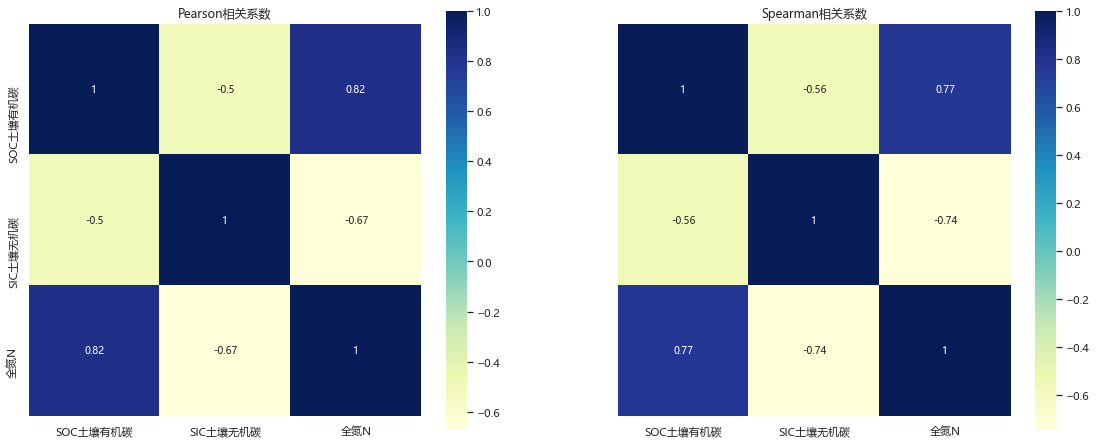

In [11]:
def _heatmapplot(corr: pd.DataFrame, fig, ax, title: str) -> None:
    sns.heatmap(corr, annot=True, square=True, cmap='YlGnBu', ax=ax)
    fig.subplots_adjust(bottom=0.3, left=0.15)
    ax.set_title(title)


def heatmapplot(data: pd.DataFrame) -> None:
    fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
    _heatmapplot(data.corr(), fig, axes[0], 'Pearson相关系数')
    _heatmapplot(data.corr('spearman'), fig, axes[1], 'Spearman相关系数')
    plt.show()

heatmapplot(tmp)

In [12]:
def bar_plot(df, col_name):
    x_group = [0.1, 0.35, 0.5, 0.75, 0.9]
    width = 0.2
    color = ['b', 'm', 'y', 'c']
    labels = ["NG", "LGI", "MGI", "HGI"]
    years = [2012, 2014, 2016, 2018, 2020]
    
    fig, ax = plt.subplots(figsize=(15, 8))
    for i in range(len(x_group)):
        for j in range(4):
            ax.bar(i+width*j, df.loc[(years[i], labels[j]), col_name], width=width, color=color[j], align="center")
            ax.text(i+width*j-0.05, -0.02, labels[j])
            ax.text(i+width*j-0.1, df.loc[(years[i], labels[j]), col_name]+0.01, f"{df.loc[(years[i], labels[j]), col_name]: .2f}")
        ax.text(i+width, -0.04, years[i], fontsize=12)
    ax.set_xticks([])
    ax.set(
        title=col_name, 
        ylabel="标准差"
    )
    ax.text(2.2, -0.06, "年份", fontsize=label_fontsize)
    plt.show()

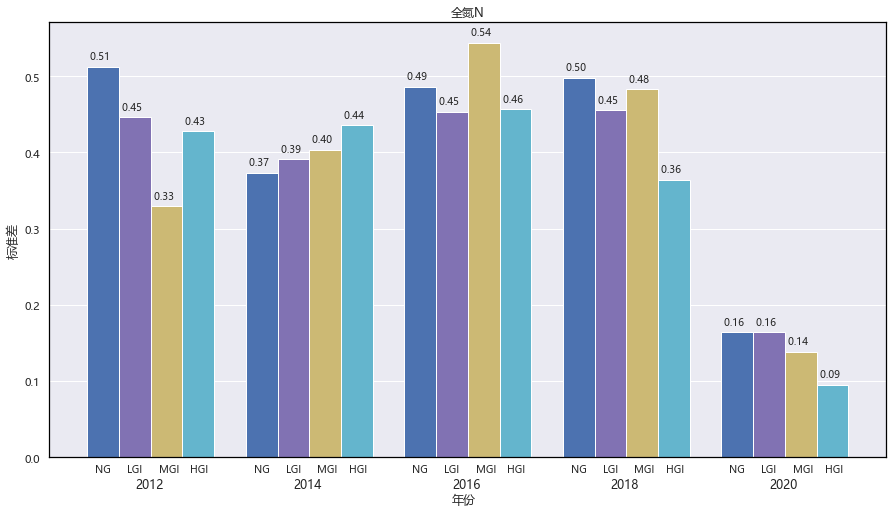

In [13]:
std = data.groupby(by=["year", "放牧强度（intensity）"]).agg("std")

# bar_plot(std, "SOC土壤有机碳")
# bar_plot(std, "SIC土壤无机碳")
bar_plot(std, "全氮N")

In [16]:
mean_v = data.groupby(by=["year", "放牧强度（intensity）"]).agg("mean")
# bar_plot(mean_v, 'SOC土壤有机碳')
# bar_plot(mean_v, "SIC土壤无机碳")
# bar_plot(mean_v, "全氮N")

#### 模型

In [19]:
model_data = data.groupby(by=["year", "放牧小区（plot）"]).mean()
years = [2012, 2014, 2016, 2018, 2020]
cols = ["SOC土壤有机碳", "SIC土壤无机碳", "全氮N"]
SOC_df, SIC_df, N_df = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
df_list = [SOC_df, SIC_df, N_df]
for i in range(len(cols)):
    df = df_list[i]
    for year in years:
        df[year] = model_data.loc[year][cols[i]]
    df["放牧强度"] = model_data.loc[year]["放牧强度"]

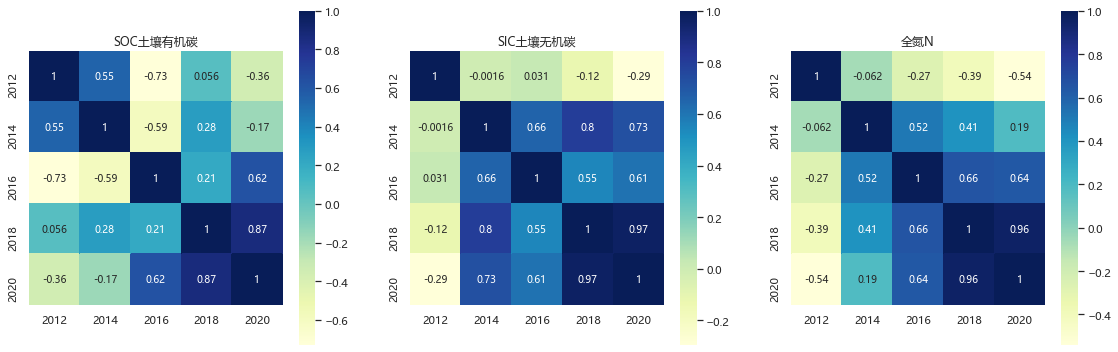

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for i in range(3):
    ax = axes[i]
    _heatmapplot(df_list[i].drop(columns="放牧强度").corr(), fig, ax, model_data.columns[i])

In [21]:
def get_feature_label(df, df1, df2):
    year = 2
    feature, label = pd.concat((df.iloc[:, 0:year], df1.iloc[:, 1], df2.iloc[:, 1], df.iloc[:, -1]), axis=1).values, df.iloc[:, 2].values
    for i in range(year+1, 5):
        tmp = pd.concat((df.iloc[:, i-year:i], df1.iloc[:, i-1], df2.iloc[:, i-1], df.iloc[:, -1]), axis=1)
        feature = np.vstack((feature, tmp))
        label = np.hstack((label, df.iloc[:, i].values))
    return feature, label

In [22]:
SOC_feature, SOC_label = get_feature_label(SOC_df, SIC_df, N_df)
SIC_feature, SIC_label = get_feature_label(SIC_df, SOC_df, N_df)
N_feature, N_label = get_feature_label(N_df, SOC_df, SIC_df)

In [23]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [24]:
class MyDataset(Dataset):
    def __init__(self, X, y) -> None:
        super().__init__()
        self.feature = torch.tensor(X, dtype=torch.float)
        self.label = torch.tensor(y, dtype=torch.float)
    
    def __getitem__(self, index):
        return self.feature[index], self.label[index]
    
    def __len__(self):
        return self.feature.shape[0]

In [25]:
class Model(nn.Module):
    def __init__(self, type):
        super().__init__()
        assert type in ["SOC", "SIC", "N"]
        if type == "SOC":
            self.w = nn.Parameter(torch.tensor([1., 1., -1., 1., 1.]).unsqueeze(1))
        elif type == "SIC":
            self.w = nn.Parameter(torch.tensor([1., 1., -1., -1., 1.]).unsqueeze(1))
        else:
            self.w = nn.Parameter(torch.tensor([1., 1., 1., -1., 1.]).unsqueeze(1))
        self.sigma = nn.Parameter(torch.ones(12, 1))
        self.mu = nn.Parameter(torch.zeros(12, 1))
    
    def forward(self, X):
        tmp = (X[:, -1].unsqueeze(1)-self.mu)**2 / 2 / self.sigma**2
        delta = torch.exp(-tmp) / torch.sqrt(torch.tensor(2*np.pi, dtype=torch.float)) / self.sigma
        return (torch.hstack((X[:, :-1], delta)) @ self.w).squeeze()

In [88]:
def MSELoss(y_pred, y):
    '''考虑相对误差的mse
    '''
    return torch.mean(((y - y_pred) / y) ** 2) * 100

In [100]:
class MyModel:
    def __init__(self, dataset, type):
        self.type = type
        self.model = Model(type)
        self.dataset = dataset
        self.dataloader = DataLoader(dataset, batch_size=12, shuffle=False)
    
    def train(self, epochs, lr=0.001):
        print(f"train {self.type}...")
        optimizer = torch.optim.SGD(self.model.parameters(), lr=lr, momentum=0.9)
        self.mse = []
        time.sleep(0.5)
        iter_ = tqdm(range(epochs))
        for epoch in iter_:
            mse = 0
            for i, (X, y) in enumerate(self.dataloader):
                y_pred = self.predict(X)
                loss = MSELoss(y_pred, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                mse += loss.item()
            mse /= (i+1)
            self.mse.append(mse)
            iter_.set_description(f"epoch: {epoch+1} mse: {mse: .4f}")
    
    def predict(self, X):
        return self.model(X)
    
    def plot_error(self, name, ylim):
        plt.figure(figsize=(12, 8))
        legend = [2016, 2018, 2020]
        with torch.no_grad():
            error = []
            for i, (X, y) in enumerate(self.dataloader):
                y_pred = self.predict(X)
                error_ = (y - y_pred) / y * 100
                error.append(error_)
                plt.plot(range(len(error_)*i, len(error_)*(i+1)), error_, 'o-', markersize=10, label=legend[i])
            error = torch.hstack(error)
            plt.plot(range(len(error)), error, '--')
            plt.legend()
            plt.xticks(ticks=range(36), labels=SOC_df.index.tolist()*3, rotation=-45)
            plt.plot([-1, 36], [0, 0], '--')
            plt.xlim([-1, 36])
            plt.ylim(ylim)
            plt.xlabel("放牧小区")
            plt.ylabel("相对误差(%)")
            plt.title(name)
        
    def state_dict(self):
        return self.model.state_dict()

    def load_state_dict(self, path):
        self.model.load_state_dict(torch.load(path))

In [104]:
SOC_dataset = MyDataset(SOC_feature, SOC_label)
SIC_dataset = MyDataset(SIC_feature, SIC_label)
N_dataset = MyDataset(N_feature, N_label)

SOC_model = MyModel(SOC_dataset, "SOC")
SIC_model = MyModel(SIC_dataset, "SIC")
N_model = MyModel(N_dataset, "N")

In [105]:
SOC_model.train(20000)

train SOC...


epoch: 20000 mse:  0.3164: 100%|██████████| 20000/20000 [02:40<00:00, 124.73it/s]


In [106]:
SIC_model.train(25000, lr=0.0005)

train SIC...


epoch: 50000 mse:  2.0934: 100%|██████████| 50000/50000 [05:36<00:00, 148.79it/s]


In [107]:
N_model.train(20000, lr=0.0001)
# 0.1721

train N...


epoch: 20000 mse:  0.1721: 100%|██████████| 20000/20000 [02:38<00:00, 126.02it/s]


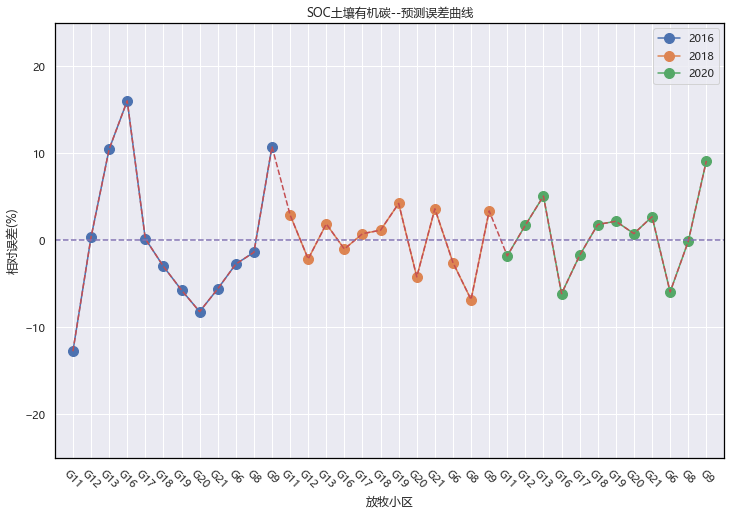

In [115]:
SOC_model.plot_error("SOC土壤有机碳--预测误差曲线", [-25, 25])

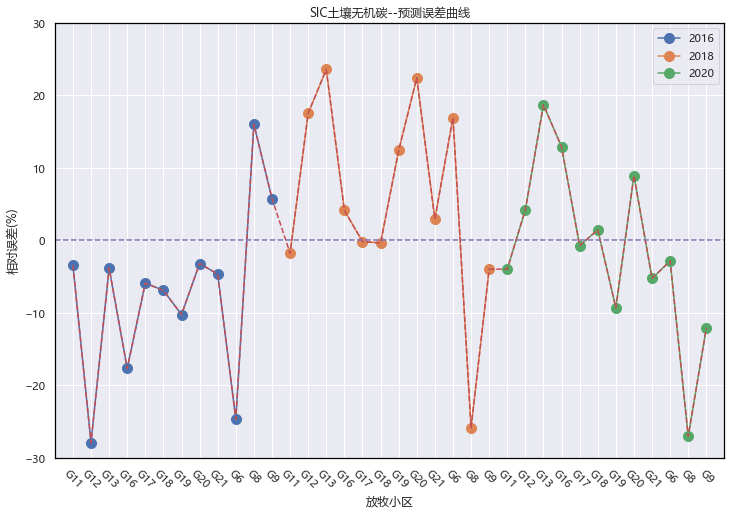

In [117]:
SIC_model.plot_error("SIC土壤无机碳--预测误差曲线", [-30, 30])

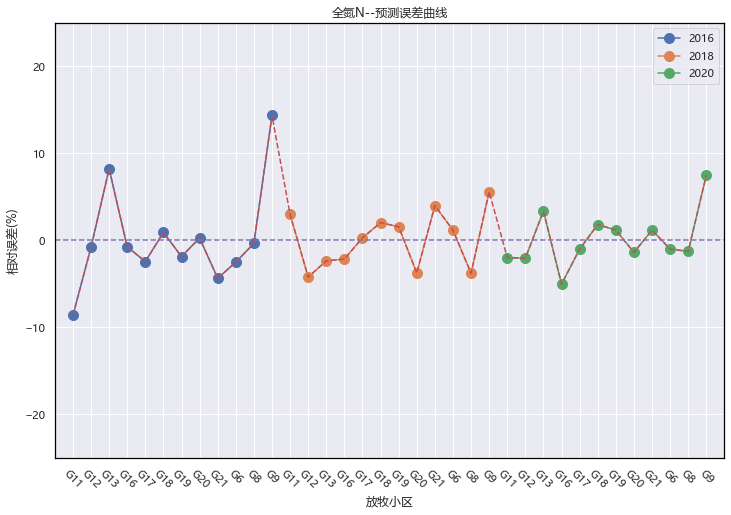

In [114]:
N_model.plot_error("全氮N--预测误差曲线", [-25, 25])

In [146]:
soc_18_20 = pd.concat((SOC_df.iloc[:, -3:-1], SIC_df.iloc[:, -2], N_df.iloc[:, -2], SOC_df.iloc[:, -1]), axis=1).values
soc_18_20 = torch.tensor(soc_18_20, dtype=torch.float)
dict(zip(SOC_df.index, SOC_model.predict(soc_18_20).tolist()))

{'G11': 15.512395858764648,
 'G12': 15.5407133102417,
 'G13': 16.18644905090332,
 'G16': 15.024160385131836,
 'G17': 17.532119750976562,
 'G18': 19.57664680480957,
 'G19': 18.387964248657227,
 'G20': 16.484779357910156,
 'G21': 20.98154067993164,
 'G6': 15.733526229858398,
 'G8': 14.906990051269531,
 'G9': 17.12113380432129}

In [147]:
sic_18_20 = pd.concat((SIC_df.iloc[:, -3:-1], SOC_df.iloc[:, -2], N_df.iloc[:, -2], SIC_df.iloc[:, -1]), axis=1).values
sic_18_20 = torch.tensor(sic_18_20, dtype=torch.float)
dict(zip(SIC_df.index, SIC_model.predict(sic_18_20).tolist()))

{'G11': 2.4118995666503906,
 'G12': 3.4986987113952637,
 'G13': 2.3803253173828125,
 'G16': 9.59750747680664,
 'G17': 5.497739315032959,
 'G18': 7.336605072021484,
 'G19': 3.2181365489959717,
 'G20': 2.7764227390289307,
 'G21': 3.653916597366333,
 'G6': 1.6612894535064697,
 'G8': 0.47450709342956543,
 'G9': 1.6039166450500488}

In [148]:
n_18_20 = pd.concat((N_df.iloc[:, -3:-1], SOC_df.iloc[:, -2], SIC_df.iloc[:, -2], N_df.iloc[:, -1]), axis=1).values
n_18_20 = torch.tensor(n_18_20, dtype=torch.float)
dict(zip(N_df.index, N_model.predict(n_18_20).tolist()))

{'G11': 2.0702271461486816,
 'G12': 2.039654016494751,
 'G13': 2.178309440612793,
 'G16': 1.8469841480255127,
 'G17': 2.277230978012085,
 'G18': 2.3944344520568848,
 'G19': 2.3627266883850098,
 'G20': 2.160604238510132,
 'G21': 2.667135715484619,
 'G6': 2.1176674365997314,
 'G8': 2.0287721157073975,
 'G9': 2.301168918609619}